### 추후 코드 스타일의 일관성에 맞게 5와 6과 비교하며 재작성 필요.

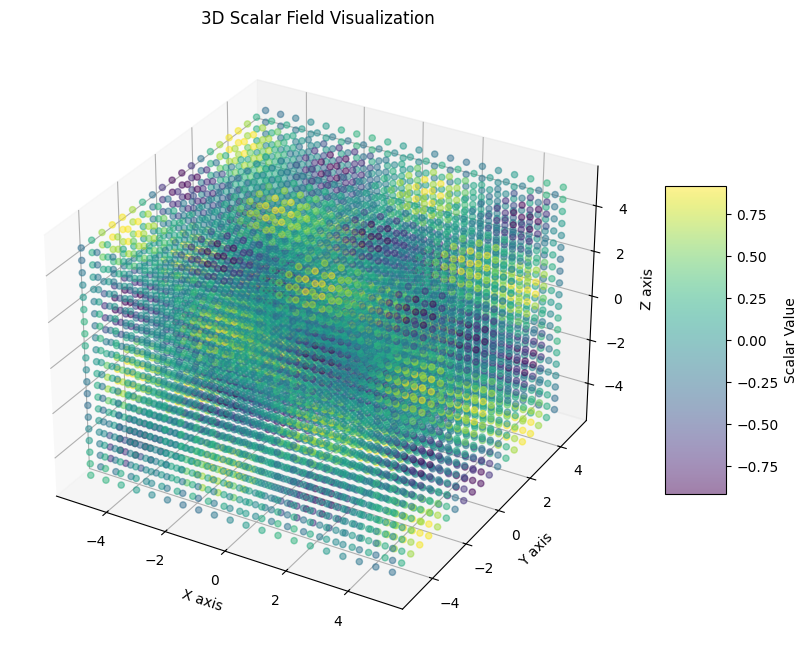

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 공간 그리드 생성
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
z = np.linspace(-5, 5, 20)
X, Y, Z = np.meshgrid(x, y, z)

# 4차원 함수(스칼라 필드) 정의
scalar_field = np.sin(X) * np.cos(Y) * np.sin(Z)

# 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도 생성. c 매개변수에 스칼라 값을, cmap으로 컬러맵을 지정
scatter = ax.scatter(X, Y, Z, c=scalar_field.flatten(), cmap='viridis', alpha=0.5)

# 축 레이블 및 타이틀 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scalar Field Visualization')

# 컬러바 추가
fig.colorbar(scatter, shrink=0.5, aspect=5, label='Scalar Value')

plt.show()

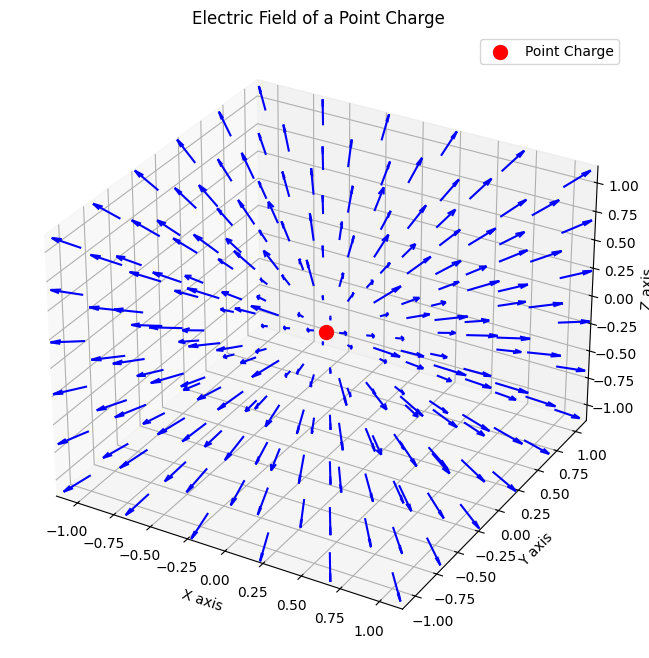

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 공간 그리드 생성
x, y, z = np.meshgrid(np.arange(-1, 1.2, 0.4),
                      np.arange(-1, 1.2, 0.4),
                      np.arange(-1, 1.2, 0.4))

# 점전하 위치 및 전하량 설정 (원점)
charge_pos = np.array([0, 0, 0])
charge = 1.0

# 각 지점에서의 전기장 벡터 계산
rx = x - charge_pos[0]
ry = y - charge_pos[1]
rz = z - charge_pos[2]
r_cubed = (rx**2 + ry**2 + rz**2)**1.5

# 0으로 나누는 것을 방지
r_cubed[r_cubed == 0] = 1e-6

Ex = charge * rx / r_cubed
Ey = charge * ry / r_cubed
Ez = charge * rz / r_cubed

# 3D 벡터 필드 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# quiver 함수를 사용하여 벡터 필드를 그림
ax.quiver(x, y, z, Ex, Ey, Ez, length=0.2, normalize=True, color='blue')

# 원점에 점전하 표시
ax.scatter([0], [0], [0], color='red', s=100, label='Point Charge')

# 축 레이블 및 타이틀 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Electric Field of a Point Charge')
ax.legend()

plt.show()

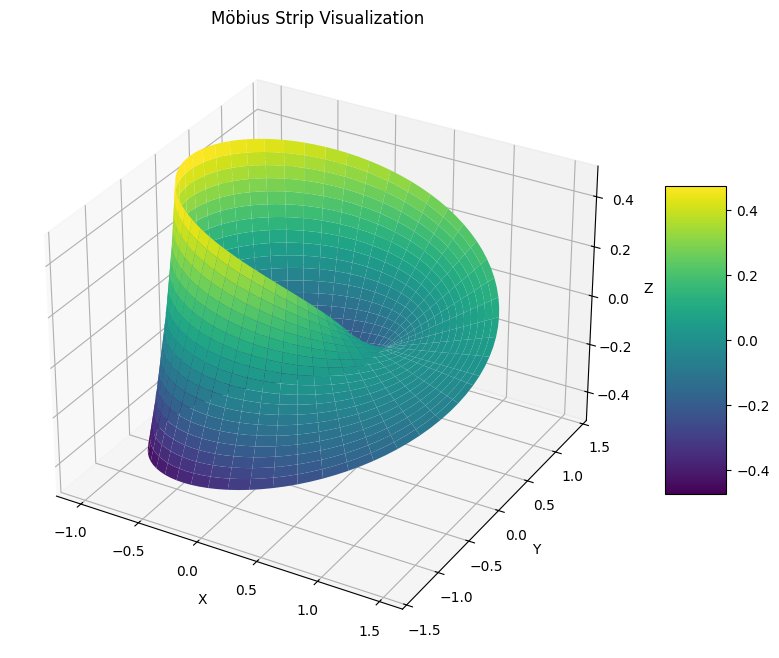

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Axes3D는 명시적으로 임포트하지 않아도 되지만, 
# 3D 플롯을 활성화하기 위해 필요할 때가 있습니다.
from mpl_toolkits.mplot3d import Axes3D

# 뫼비우스의 띠를 위한 매개변수 설정
theta = np.linspace(0, 2 * np.pi, 100)
w = np.linspace(-0.5, 0.5, 20)
theta, w = np.meshgrid(theta, w)

# 뫼비우스의 띠 매개변수 방정식
phi = 0.5 * theta
r = 1 + w * np.cos(phi)

x = r * np.cos(theta)
y = r * np.sin(theta)
z = w * np.sin(phi)

# 3D 표면 플롯으로 시각화
fig = plt.figure(figsize=(10, 8))

# ---- 오류 수정 부분 ----
# ax = fig.gca(projection='3d')  # <- 기존의 잘못된 코드
ax = fig.add_subplot(projection='3d') # <- 수정된 코드

surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# 축 레이블 및 타이틀 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Möbius Strip Visualization')

# 컬러바 추가
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

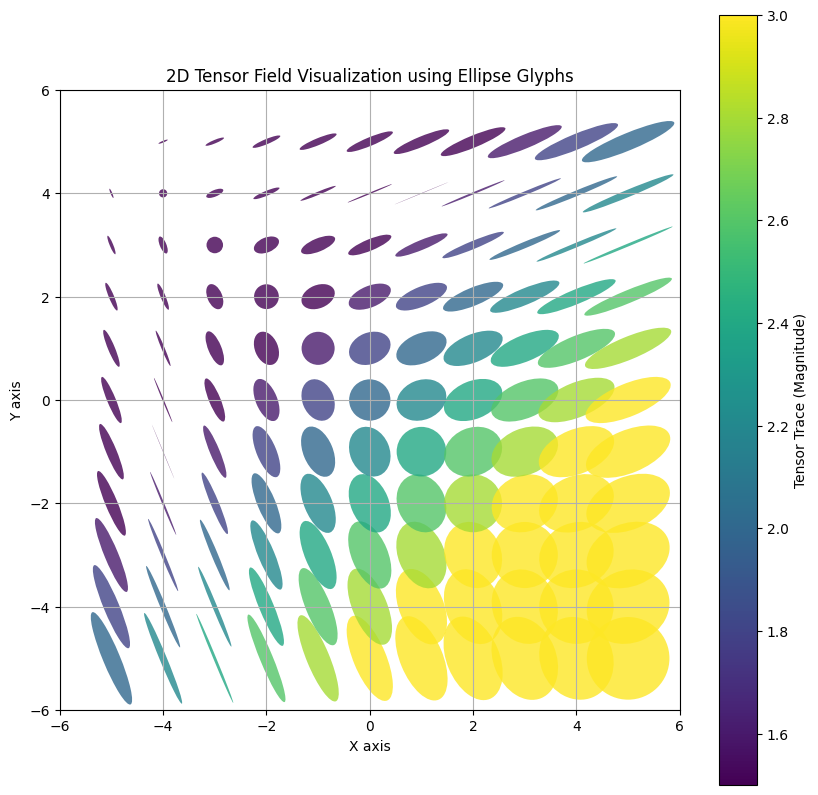

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 2D 공간 그리드 생성
y, x = np.mgrid[-5:6, -5:6]

# 각 그리드 지점에 2x2 대칭 텐서장 정의
# 예: T = [[1+x/5, (x+y)/10], [(x+y)/10, 1-y/5]]
T = np.zeros((x.shape[0], x.shape[1], 2, 2))
T[..., 0, 0] = 1 + x / 5.0
T[..., 1, 1] = 1 - y / 5.0
T[..., 0, 1] = (x + y) / 10.0
T[..., 1, 0] = (x + y) / 10.0

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))

# 각 지점을 순회하며 텐서를 타원으로 표현
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        # 현재 위치의 텐서
        tensor = T[i, j]
        
        # 텐서의 고유값과 고유벡터 계산
        eigvals, eigvecs = np.linalg.eigh(tensor)
        
        # 고유벡터로부터 타원의 회전 각도 계산
        # 첫 번째 고유벡터(v1)가 x축과 이루는 각도
        v1 = eigvecs[:, 0]
        angle = np.degrees(np.arctan2(v1[1], v1[0]))
        
        # 고유값으로부터 타원의 폭과 높이 설정 (스케일링 포함)
        width, height = 0.8 * eigvals
        
        # 타원의 색상 설정 (예: 텐서의迹(trace)에 따라)
        # Trace는 텐서의 대각합으로, 발산이나 수축의 경향을 나타낼 수 있음
        trace = np.trace(tensor)
        color = plt.cm.viridis((trace - 1.5) / 1.5) # 색상 정규화
        
        # Ellipse 객체 생성
        ellipse = Ellipse(xy=(x[i, j], y[i, j]), 
                          width=width, 
                          height=height, 
                          angle=angle,
                          facecolor=color,
                          alpha=0.8)
        
        # 축에 타원 추가
        ax.add_patch(ellipse)

# 플롯 설정
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.set_title('2D Tensor Field Visualization using Ellipse Glyphs')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.grid(True)

# 컬러바를 위한 더미 플롯
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1.5, vmax=3))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Tensor Trace (Magnitude)')


plt.show()

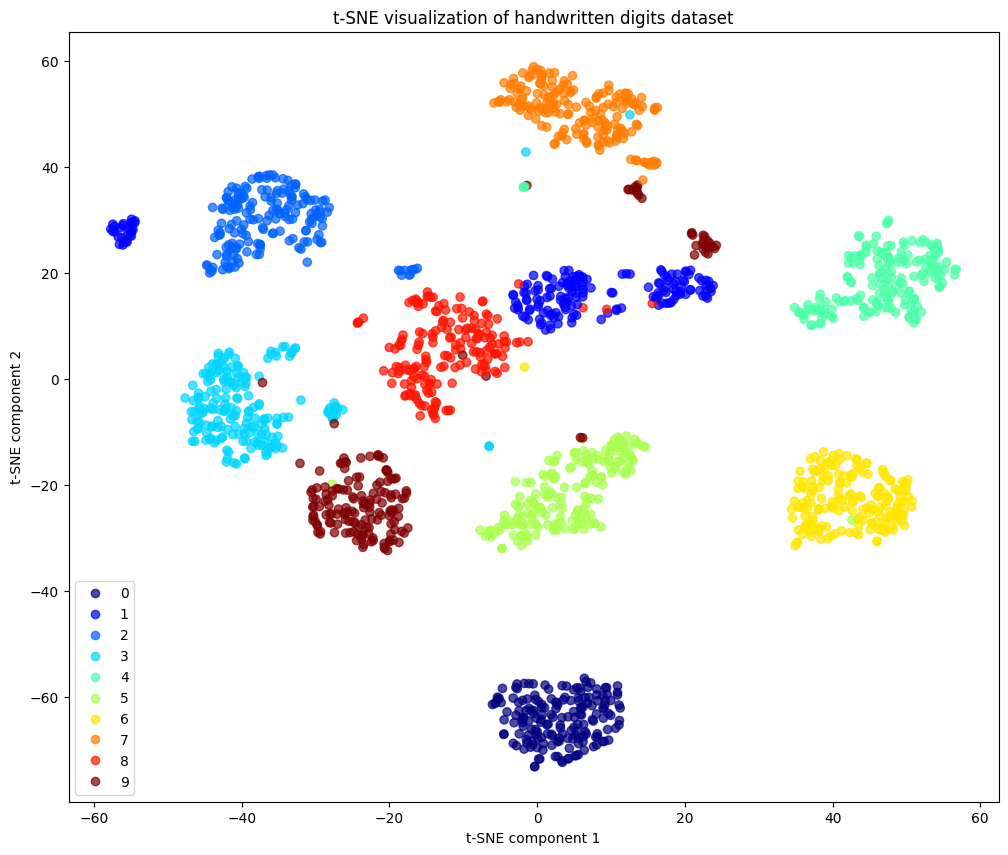

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 64차원의 숫자 이미지 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(12, 10))

# ---- 경고가 발생한 라인 수정 ----
# 기존 코드: cmap=plt.cm.get_cmap("jet", 10)
# 수정된 코드: cmap=plt.get_cmap("jet", 10)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.get_cmap("jet", 10), alpha=0.7)


plt.title('t-SNE visualization of handwritten digits dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(digits.target_names))
plt.show()

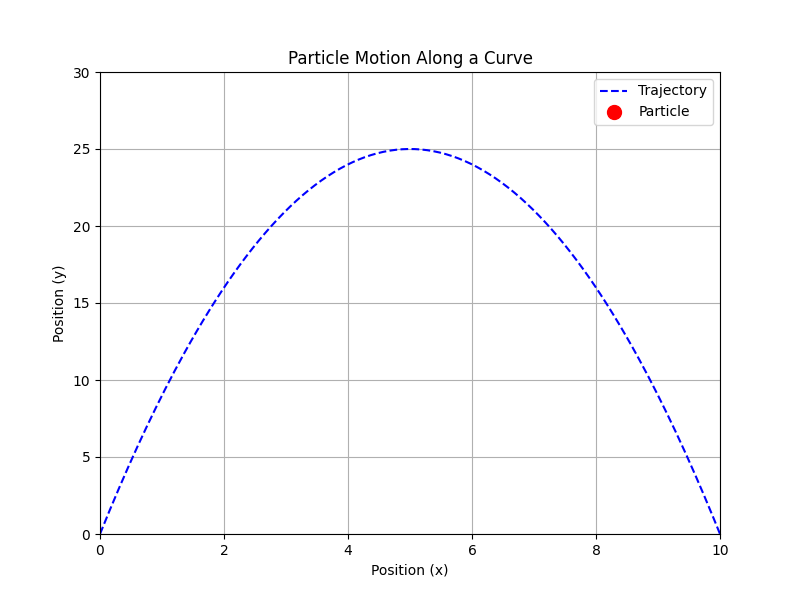

In [4]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Figure 및 축 설정
fig, ax = plt.subplots(figsize=(8, 6))

# 축 범위 및 레이블 설정
ax.set_xlim(0, 10)
ax.set_ylim(0, 30)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Position (y)")
ax.set_title("Particle Motion Along a Curve")
ax.grid(True)

# 2. 입자가 따라 움직일 곡선 정의 (예: 포물선)
x_curve = np.linspace(0, 10, 200)
y_curve = - (x_curve - 5)**2 + 25
ax.plot(x_curve, y_curve, 'b--', label='Trajectory') # 궤적을 점선으로 표시

# 3. 애니메이션 될 입자 객체 생성
# 초기 위치는 (0, 0)이며, 'o'는 원 모양 마커, c='red'는 색상을 의미합니다.
particle, = ax.plot([], [], 'ro', markersize=10, label='Particle')

# 범례 표시
ax.legend()

# 4. 애니메이션 업데이트 함수 정의
def update(frame):
    # frame은 0부터 frames-1 까지의 정수입니다.
    # 입자의 x, y 위치를 곡선 위의 점으로 설정합니다.
    # frame 값에 따라 곡선 위의 다음 위치로 이동합니다.
    x_point = x_curve[frame]
    y_point = y_curve[frame]
    
    # 입자의 데이터 업데이트
    particle.set_data([x_point], [y_point])
    
    return particle,

# 5. FuncAnimation을 사용하여 애니메이션 생성
# frames는 전체 애니메이션 길이를 결정합니다. 여기서는 곡선의 점 개수와 맞춥니다.
# interval은 프레임 간의 지연 시간(밀리초)입니다.
ani = FuncAnimation(fig, update, frames=len(x_curve), blit=True, interval=25)

# 애니메이션 보여주기
plt.show()

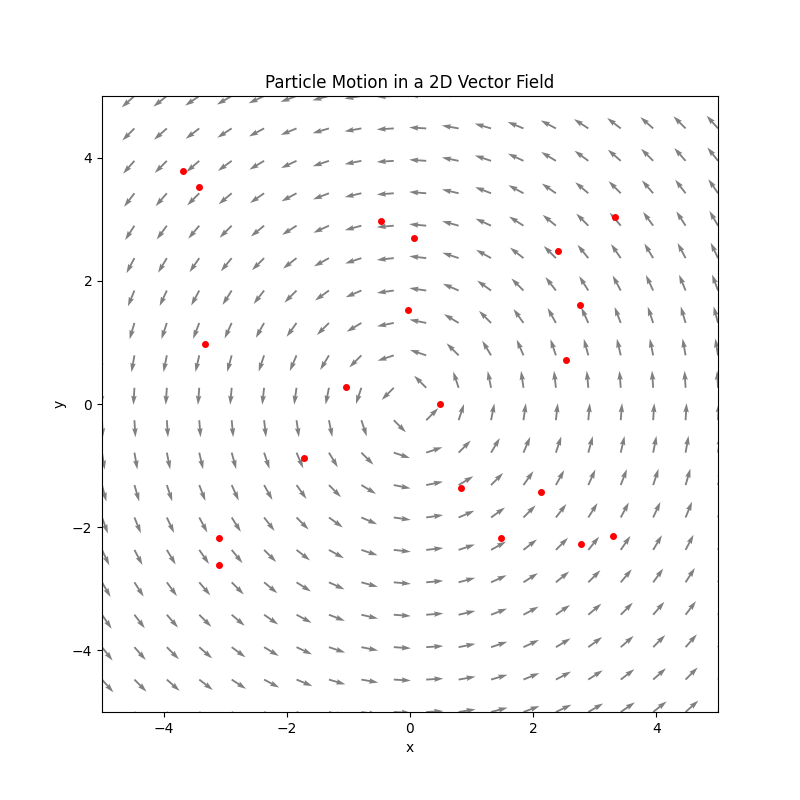

In [6]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Figure 및 축 설정
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Particle Motion in a 2D Vector Field")
ax.set_aspect('equal') # x, y 축의 비율을 동일하게 설정

# 2. 벡터장 정의 및 시각화
# 격자 생성
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))

# 소용돌이 벡터장 정의 (u는 x방향 속도, v는 y방향 속도)
# u = -y, v = x
r = np.sqrt(x**2 + y**2)
r[r == 0] = 1 # 0으로 나누는 것을 방지
u = -y / r
v = x / r

# quiver를 사용하여 벡터장을 화살표로 그립니다.
ax.quiver(x, y, u, v, color='gray')

# 3. 입자 초기화
# 20개의 입자를 무작위 위치에 생성합니다.
n_particles = 20
# p_pos는 (n_particles, 2) 형태의 배열로, 각 행이 입자의 [x, y] 좌표를 저장합니다.
p_pos = (np.random.rand(n_particles, 2) - 0.5) * 8

# 애니메이션 될 입자 객체 생성
# 초기 위치에 빨간색 점으로 입자를 그립니다.
particles, = ax.plot(p_pos[:, 0], p_pos[:, 1], 'ro', markersize=4)

# 4. 시뮬레이션 파라미터
dt = 0.1 # 시간 간격 (Time step)

# 5. 애니메이션 업데이트 함수 정의
def update(frame):
    global p_pos # p_pos 배열을 함수 내에서 수정하기 위해 global로 선언
    
    # 각 입자의 위치를 업데이트
    for i in range(n_particles):
        px, py = p_pos[i]
        
        # 현재 입자 위치 (px, py)에서의 벡터장 값을 계산
        pr = np.sqrt(px**2 + py**2)
        if pr == 0: pr = 1
        
        vel_x = -py / pr
        vel_y =  px / pr
        
        # 오일러 방법을 사용하여 다음 위치 계산
        # new_pos = current_pos + velocity * dt
        px_new = px + vel_x * dt
        py_new = py + vel_y * dt
        
        p_pos[i] = [px_new, py_new]

    # 모든 입자의 새로운 위치를 한 번에 업데이트
    particles.set_data(p_pos[:, 0], p_pos[:, 1])
    
    return particles,

# 6. FuncAnimation을 사용하여 애니메이션 생성
ani = FuncAnimation(fig, update, frames=200, blit=True, interval=50)

# 애니메이션 보여주기
plt.show()

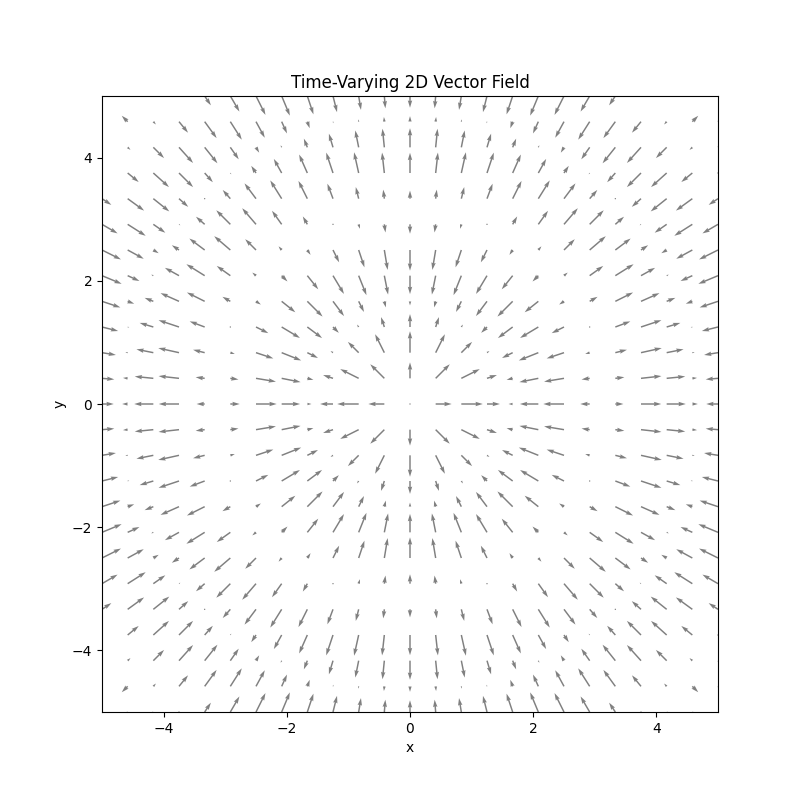

In [7]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Figure 및 축 설정
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Time-Varying 2D Vector Field")
ax.set_aspect('equal')

# 2. 벡터장이 그려질 격자 생성
x, y = np.meshgrid(np.linspace(-5, 5, 25), np.linspace(-5, 5, 25))

# 각 격자점의 원점으로부터의 거리를 미리 계산
r = np.sqrt(x**2 + y**2)
# 0으로 나누는 것을 방지하기 위해 0인 값은 1로 변경
r[r == 0] = 1

# 3. 초기 벡터장 (t=0 일 때) 계산 및 Quiver 객체 생성
# 이 Quiver 객체 'Q'를 계속해서 업데이트할 것입니다.
t = 0
# 파동 함수 예시: sin(k*r - w*t). 여기서 k와 w는 임의의 상수입니다.
magnitude = np.sin(2 * r - t) 
u = (x / r) * magnitude
v = (y / r) * magnitude

# quiver 객체를 'Q'라는 변수에 저장합니다.
Q = ax.quiver(x, y, u, v, color='gray')

# 시간 표시 텍스트
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# 4. 애니메이션 업데이트 함수 정의
def update(frame):
    # 'frame'을 시간 변수 't'로 사용합니다. 속도 조절을 위해 상수를 곱할 수 있습니다.
    t = frame * 0.1
    
    # 매 프레임마다 벡터장의 크기(magnitude)를 다시 계산
    magnitude = np.sin(2 * r - t)
    
    # 새로운 U, V 성분을 계산
    u_new = (x / r) * magnitude
    v_new = (y / r) * magnitude
    
    # Quiver 객체의 U, V 데이터를 새로운 값으로 업데이트합니다.
    # 이것이 필드 자체를 변화시키는 핵심 부분입니다.
    Q.set_UVC(u_new, v_new)
    
    time_text.set_text(f'Time Step = {frame}')
    
    # 업데이트된 객체들을 반환
    return Q, time_text

# 5. FuncAnimation을 사용하여 애니메이션 생성
# fargs: update 함수에 추가 인자를 전달할 때 사용 (여기서는 불필요)
# blit=False로 설정. Quiver 애니메이션은 blit=True와 호환성 문제가 있을 수 있습니다.
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=False)

# 애니메이션 보여주기
plt.show()

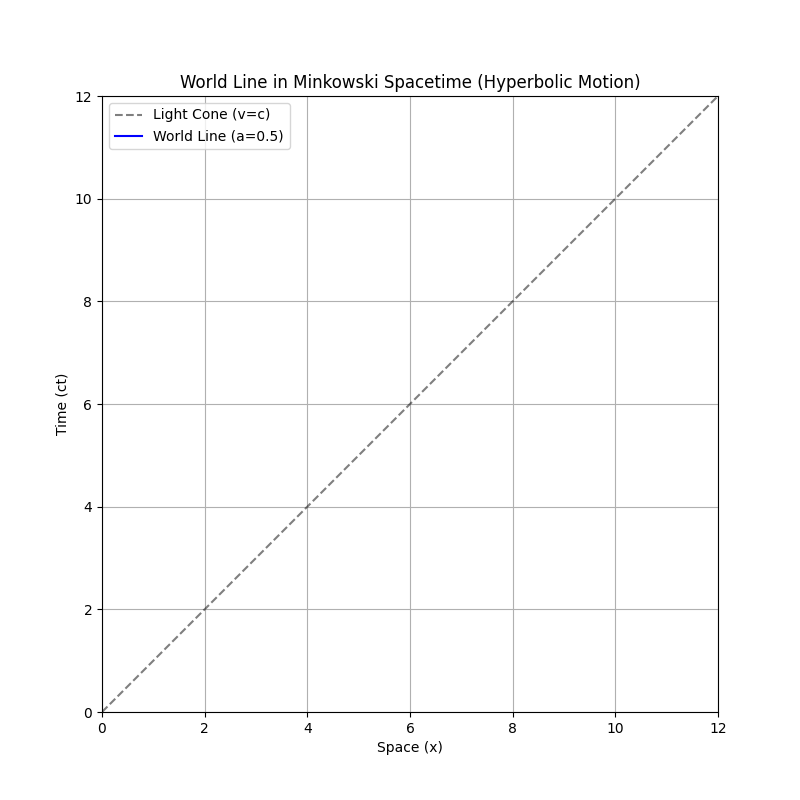

In [2]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- 물리 상수 및 시뮬레이션 설정 ---
c = 1.0  # 빛의 속도 (c=1로 정규화)
a = 0.5  # 고유 가속도 (Proper acceleration)
n_frames = 200

# --- 쌍곡선 운동 궤적 계산 ---
# 고유 시간(proper time) tau를 파라미터로 사용
tau = np.linspace(0, 4, n_frames) 

# 시공간 좌표 계산
# x(tau) = (c^2/a) * (cosh(a*tau/c) - 1)
# t(tau) = (c/a) * sinh(a*tau/c)
x_coords = (c**2 / a) * (np.cosh(a * tau / c) - 1)
ct_coords = c * (c / a) * np.sinh(a * tau / c)


# --- 그래프 및 애니메이션 설정 ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.set_xlabel("Space (x)")
ax.set_ylabel("Time (ct)")
ax.set_title("World Line in Minkowski Spacetime (Hyperbolic Motion)")
ax.set_aspect('equal')
ax.grid(True)

# 1. 광추(Light Cone) 그리기 (정적인 배경)
light_cone_x = np.linspace(0, 12, 100)
ax.plot(light_cone_x, light_cone_x, 'k--', alpha=0.5, label='Light Cone (v=c)')

# 2. 애니메이션될 객체 생성
# 세계선 (지금까지의 경로를 추적)
world_line, = ax.plot([], [], 'b-', label=f'World Line (a={a})')
# 현재 사건 (현재 시점의 점)
current_event, = ax.plot([], [], 'ro', markersize=8)
# 시간 텍스트
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.legend()

# --- 애니메이션 업데이트 함수 ---
def update(frame):
    # 'frame'까지의 데이터를 사용하여 세계선을 그립니다.
    world_line.set_data(x_coords[:frame+1], ct_coords[:frame+1])
    
    # 'frame'의 현재 위치에 점을 찍습니다.
    current_event.set_data([x_coords[frame]], [ct_coords[frame]])
    
    time_text.set_text(f'Proper Time τ = {tau[frame]:.2f}')
    
    return world_line, current_event, time_text

# --- 애니메이션 생성 및 실행 ---
ani = FuncAnimation(fig, update, frames=n_frames, blit=True, interval=50)

plt.show()

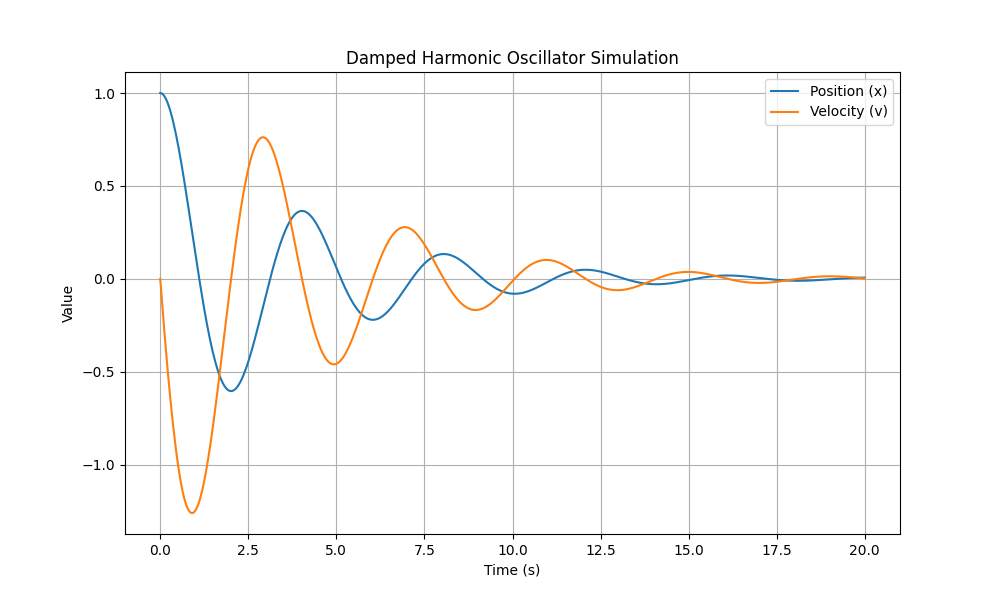

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 1. 미분방정식 정의 (물리 법칙)
# y는 상태 벡터 [위치 x, 속도 v]
# t는 시간
# m, c, k는 시스템의 파라미터 (질량, 감쇠계수, 용수철상수)
def damped_oscillator(t, y, m, c, k):
    x, v = y
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# 2. 시뮬레이션 파라미터 및 초기 조건 설정
m = 1.0       # 질량 (kg)
k = 2.5       # 용수철 상수 (N/m)
c = 0.5       # 감쇠 계수 (Ns/m)

x0 = 1.0      # 초기 위치 (m)
v0 = 0.0      # 초기 속도 (m/s)
initial_state = [x0, v0]

t_span = [0, 20] # 시뮬레이션 시간 범위 (0초부터 20초까지)
t_eval = np.linspace(t_span[0], t_span[1], 500) # 결과를 계산할 시간 지점들

# 3. 미분방정식 풀기 (시뮬레이션 실행)
# solve_ivp 함수가 모든 복잡한 계산을 알아서 해줍니다.
solution = solve_ivp(
    fun=damped_oscillator,      # 풀고자 하는 미분방정식 함수
    t_span=t_span,              # 시간 범위
    y0=initial_state,           # 초기 상태
    args=(m, c, k),             # 방정식에 전달할 추가 파라미터
    t_eval=t_eval               # 결과를 저장할 시간들
)

# 4. 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Position (x)')
plt.plot(solution.t, solution.y[1], label='Velocity (v)')
plt.title('Damped Harmonic Oscillator Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

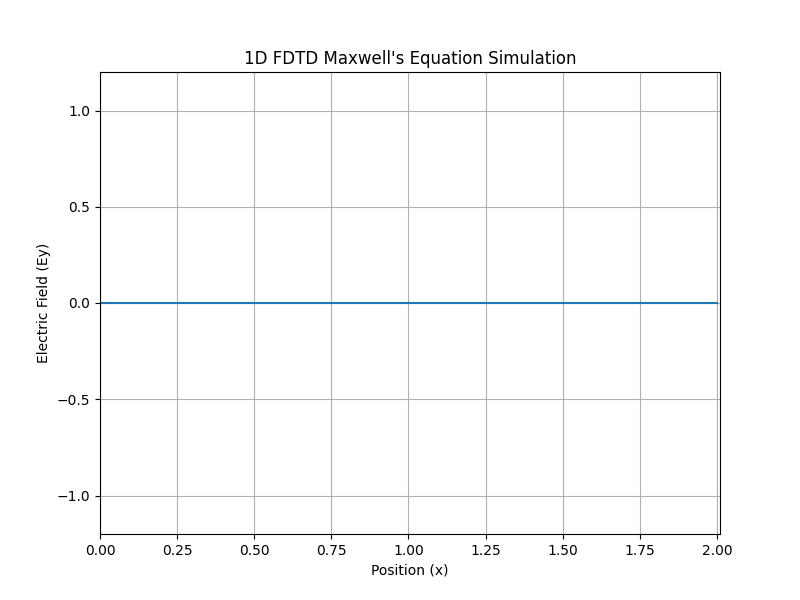

In [3]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === (이하 코드는 이전과 동일) ===
KE = 201
c = 1.0
dx = 0.01
dt = dx / (2 * c)
nsteps = 800

ey = np.zeros(KE)
hy = np.zeros(KE)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(0, KE * dx)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Electric Field (Ey)")
ax.set_title("1D FDTD Maxwell's Equation Simulation")
ax.grid(True)

line, = ax.plot(np.arange(KE) * dx, ey)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def update(frame):
    for k in range(KE - 1):
        hy[k] = hy[k] + (ey[k + 1] - ey[k]) / c
    for k in range(1, KE - 1):
        ey[k] = ey[k] + (hy[k] - hy[k - 1]) * c
    pulse = np.exp(-0.005 * (frame - 100)**2)
    ey[KE // 2] += pulse
    line.set_ydata(ey)
    time_text.set_text(f'Time Step = {frame}')
    return line, time_text

ani = FuncAnimation(fig, update, frames=nsteps, blit=True, interval=5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML #위와는 다른 ffmpeg를 이용한 애니메이션화

# === 시뮬레이션 파라미터 ===
KE = 201  # 공간 격자점 개수
c = 1.0   # 빛의 속도
dx = 0.01 # 공간 간격
dt = dx / (2 * c) # 시간 간격 (CFL 안정성 조건 만족)
nsteps = 800 # 총 시간 스텝

# === 필드 초기화 ===
ey = np.zeros(KE)
hy = np.zeros(KE)

# === 시각화 설정 ===
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(0, KE * dx)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Electric Field (Ey)")
ax.set_title("1D FDTD Maxwell's Equation Simulation")
ax.grid(True)

line, = ax.plot(np.arange(KE) * dx, ey)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


# === FDTD 업데이트 함수 ===
def update(frame):
    # 1. 자기장(Hy) 업데이트
    for k in range(KE - 1):
        hy[k] = hy[k] + (ey[k + 1] - ey[k]) / c

    # 2. 전기장(Ey) 업데이트
    for k in range(1, KE - 1):
        ey[k] = ey[k] + (hy[k] - hy[k - 1]) * c

    # 3. 소스(Source) 주입: 중앙에서 가우시안 펄스 생성
    pulse = np.exp(-0.005 * (frame - 100)**2)
    ey[KE // 2] += pulse
    line.set_ydata(ey)
    time_text.set_text(f'Time Step = {frame}')
    return line, time_text

# 애니메이션 객체 생성
ani = FuncAnimation(fig, update, frames=nsteps, blit=True, interval=5)

# --- plt.show() 대신 아래 코드로 변경 ---
# 생성된 애니메이션을 HTML5 비디오로 변환
plt.close() # 중복 플롯 방지
HTML(ani.to_html5_video())

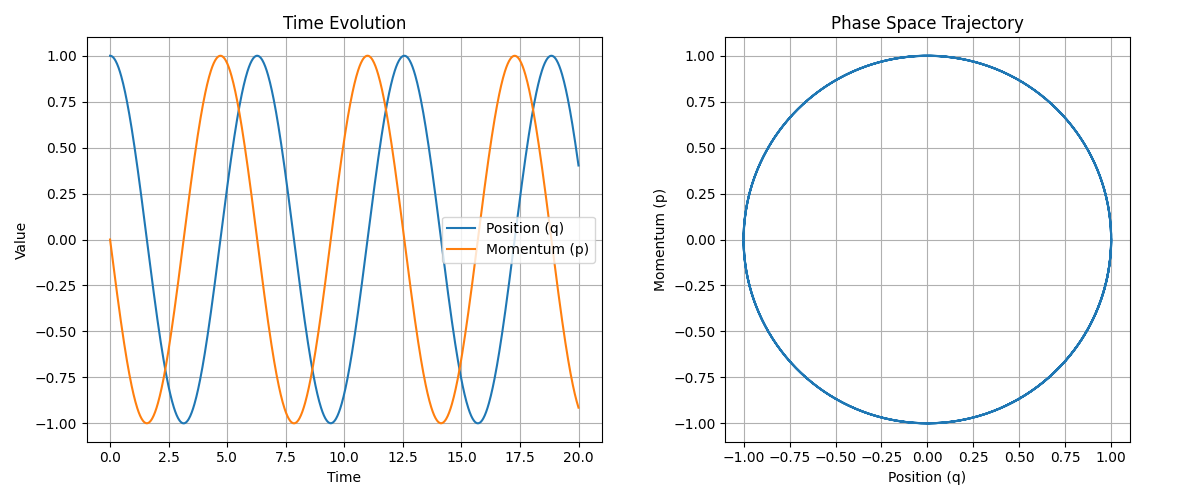

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# === 물리 시스템 정의 ===
# 해밀토니안 H = p^2 / (2m) + (k * q^2) / 2
# 해밀턴 방정식: dq/dt = dH/dp = p/m,  dp/dt = -dH/dq = -kq
def hamiltonian_eqs(t, state, m, k):
    q, p = state  # q: 위치, p: 운동량
    dqdt = p / m
    dpdt = -k * q
    return [dqdt, dpdt]

# === 파라미터 및 초기 조건 ===
m = 1.0  # 질량
k = 1.0  # 용수철 상수
q0 = 1.0 # 초기 위치
p0 = 0.0 # 초기 운동량
initial_state = [q0, p0]

# 시뮬레이션 시간 설정
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# === 해밀턴 방정식 풀기 ===
solution = solve_ivp(
    fun=hamiltonian_eqs,
    t_span=t_span,
    y0=initial_state,
    args=(m, k),
    t_eval=t_eval,
    dense_output=True
)

# === 결과 시각화 ===
q_sol = solution.y[0]
p_sol = solution.y[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. 시간에 따른 위치와 운동량
ax1.plot(solution.t, q_sol, label='Position (q)')
ax1.plot(solution.t, p_sol, label='Momentum (p)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Time Evolution')
ax1.legend()
ax1.grid(True)

# 2. 위상 공간(Phase Space) 궤적
ax2.plot(q_sol, p_sol)
ax2.set_xlabel('Position (q)')
ax2.set_ylabel('Momentum (p)')
ax2.set_title('Phase Space Trajectory')
ax2.set_aspect('equal')
ax2.grid(True)

plt.tight_layout()
plt.show()

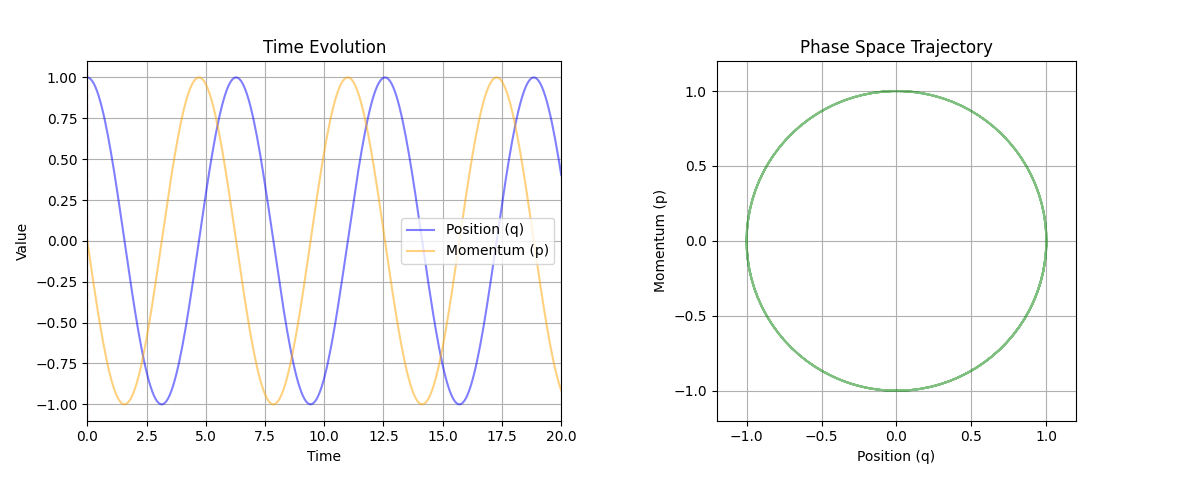

In [6]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === (이하 물리 시스템 정의 및 방정식 풀이는 기존과 동일) ===
def hamiltonian_eqs(t, state, m, k):
    q, p = state
    dqdt = p / m
    dpdt = -k * q
    return [dqdt, dpdt]

m = 1.0
k = 1.0
q0 = 1.0
p0 = 0.0
initial_state = [q0, p0]

t_span = [0, 20]
# 애니메이션을 위해 프레임 수를 좀 더 명시적으로 조절 (예: 300 프레임)
n_frames = 300
t_eval = np.linspace(t_span[0], t_span[1], n_frames)

solution = solve_ivp(
    fun=hamiltonian_eqs,
    t_span=t_span,
    y0=initial_state,
    args=(m, k),
    t_eval=t_eval,
    dense_output=True
)

q_sol = solution.y[0]
p_sol = solution.y[1]
t_sol = solution.t


# === 애니메이션을 위한 시각화 설정 ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout(pad=4.0) # subplot 간격 조절

# --- 1. 시간에 따른 진화 그래프 설정 (ax1) ---
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.set_title('Time Evolution')
ax1.grid(True)
# 전체 궤적을 배경으로 미리 그려놓기
ax1.plot(t_sol, q_sol, 'b-', alpha=0.5, label='Position (q)')
ax1.plot(t_sol, p_sol, '-', color='orange', alpha=0.5, label='Momentum (p)')
ax1.legend()

# 애니메이션 될 객체들: 현재 시간선, 현재 위치점, 현재 운동량점
time_line = ax1.axvline(x=t_sol[0], color='r', linestyle='--')
q_point, = ax1.plot([], [], 'bo', markersize=8)
p_point, = ax1.plot([], [], 'o', color='orange', markersize=8)
ax1.set_xlim(t_span)


# --- 2. 위상 공간 그래프 설정 (ax2) ---
ax2.set_xlabel('Position (q)')
ax2.set_ylabel('Momentum (p)')
ax2.set_title('Phase Space Trajectory')
ax2.set_aspect('equal')
ax2.grid(True)
# 전체 궤적을 배경으로 미리 그려놓기
ax2.plot(q_sol, p_sol, 'g-', alpha=0.5)

# 애니메이션 될 객체: 위상 공간의 현재 상태를 나타내는 점
phase_point, = ax2.plot([], [], 'ro', markersize=8)
ax2.set_xlim(min(q_sol)-0.2, max(q_sol)+0.2)
ax2.set_ylim(min(p_sol)-0.2, max(p_sol)+0.2)

# === 애니메이션 업데이트 함수 정의 ===
def update(frame):
    # 현재 프레임에 해당하는 시간, 위치, 운동량
    current_t = t_sol[frame]
    current_q = q_sol[frame]
    current_p = p_sol[frame]
    
    # 그래프 1 업데이트
    time_line.set_xdata([current_t])
    q_point.set_data([current_t], [current_q])
    p_point.set_data([current_t], [current_p])
    
    # 그래프 2 업데이트
    phase_point.set_data([current_q], [current_p])
    
    return time_line, q_point, p_point, phase_point,

# === 애니메이션 생성 및 실행 ===
ani = FuncAnimation(
    fig, 
    update, 
    frames=n_frames, 
    blit=True, 
    interval=30
)

plt.show()

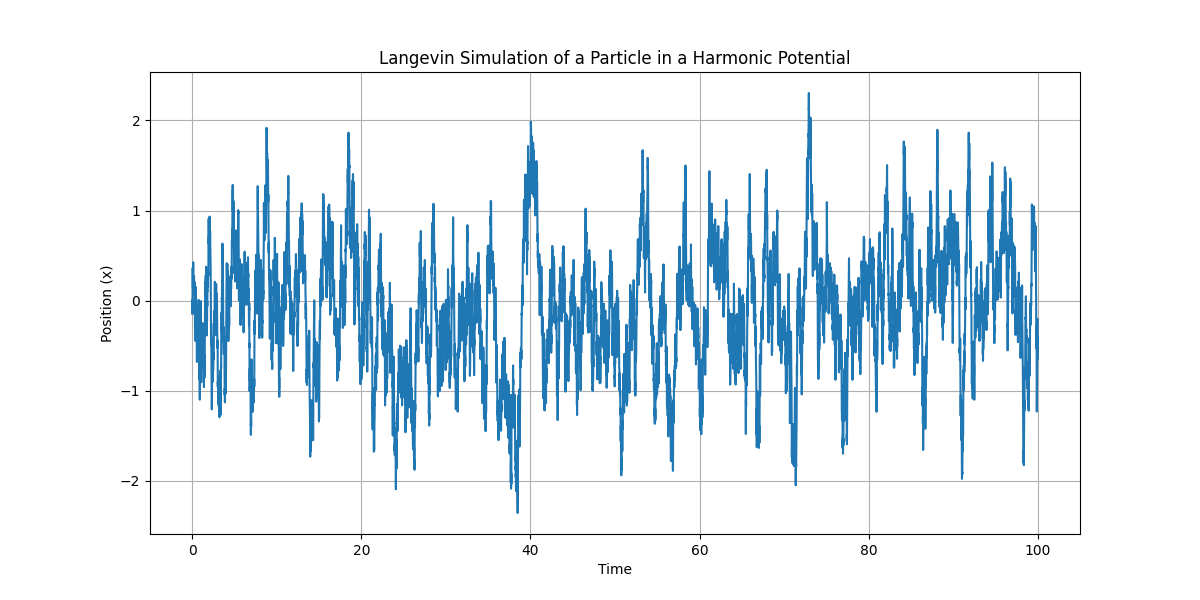

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === 시뮬레이션 파라미터 ===
gamma = 1.0  # 마찰 계수
k = 2.0      # 용수철 상수 (포텐셜의 세기)
kT = 1.0     # 온도 에너지 (랜덤한 힘의 세기)
dt = 0.01    # 시간 간격
nsteps = 10000 # 총 스텝 수

# 초기 위치
x = 0.0

# 궤적을 저장할 배열
trajectory = np.zeros(nsteps)

# === 시뮬레이션 루프 (오일러-마루야마 방법) ===
for i in range(nsteps):
    # 1. 결정론적 힘 (용수철 복원력)
    force_det = -k * x
    
    # 2. 확률적 힘 (랜덤한 열적 요동)
    # np.sqrt(2 * gamma * kT / dt)는 힘의 크기, np.random.randn()는 표준정규분포 난수
    force_stoch = np.sqrt(2 * gamma * kT / dt) * np.random.randn()
    
    # 3. 위치 업데이트 (1차 랑주뱅 방정식)
    x = x + (force_det / gamma) * dt + (force_stoch / gamma) * dt
    
    trajectory[i] = x

# === 결과 시각화 ===
time = np.arange(nsteps) * dt

plt.figure(figsize=(12, 6))
plt.plot(time, trajectory)
plt.title("Langevin Simulation of a Particle in a Harmonic Potential")
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.grid(True)
plt.show()

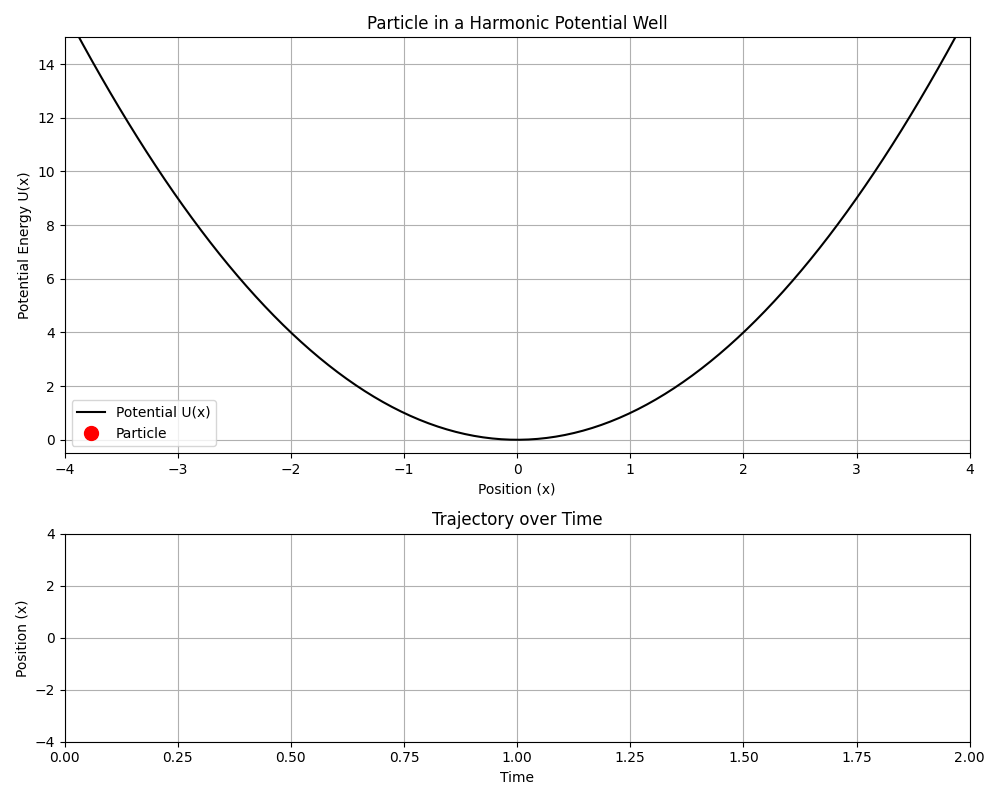

In [28]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
# (Jupyter Notebook이나 IPython 환경에서 사용)
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === 시뮬레이션 파라미터 ===
gamma = 1.0      # 마찰 계수
k = 2.0          # 용수철 상수 (포텐셜의 세기)
kT = 1.0         # 온도 에너지 (랜덤한 힘의 세기)
dt = 0.01        # 시간 간격
nsteps = 200     # 애니메이션 스텝 수 (이전보다 줄여서 확인하기 용이하게 설정)

# === 애니메이션을 위한 시각화 설정 ===
fig = plt.figure(figsize=(10, 8))
# 그리드를 2행 1열로 나누고, 위쪽이 더 넓게 설정
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])

# --- 1. 물리적 공간 (포텐셜 우물) 그래프 (ax1) ---
ax1 = fig.add_subplot(gs[0])
ax1.set_title("Particle in a Harmonic Potential Well")
ax1.set_xlabel("Position (x)")
ax1.set_ylabel("Potential Energy U(x)")

# 포텐셜 에너지 U(x) = 0.5 * k * x^2 계산 및 그리기
potential_x = np.linspace(-4, 4, 200)
potential_y = 0.5 * k * potential_x**2
ax1.plot(potential_x, potential_y, 'k-', label='Potential U(x)')
ax1.set_ylim(-0.5, 15)
ax1.set_xlim(-4, 4)
ax1.grid(True)

# 애니메이션 될 입자 객체 생성
particle, = ax1.plot([], [], 'ro', markersize=10, label='Particle')
ax1.legend()

# --- 2. 시간 궤적 그래프 (ax2) ---
ax2 = fig.add_subplot(gs[1])
ax2.set_title("Trajectory over Time")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position (x)")
ax2.set_xlim(0, nsteps * dt)
ax2.set_ylim(-4, 4)
ax2.grid(True)

# [수정됨] 애니메이션 될 궤적을 선이 아닌 점으로 객체 생성
trajectory_line, = ax2.plot([], [], 'b.', markersize=2)

# 시간 표시 텍스트
time_text = ax1.text(0.02, 0.9, '', transform=ax1.transAxes)

# 시뮬레이션 상태 변수 초기화
x = 0.0
# 궤적 데이터를 저장할 리스트
time_data, pos_data = [], []

# === [추가됨] 애니메이션 초기화 함수 ===
# 애니메이션이 시작되거나 반복될 때 호출되어 데이터를 깨끗하게 비웁니다.
def init():
    # 데이터 리스트를 비웁니다.
    time_data.clear()
    pos_data.clear()
    
    # 그래프 상의 객체들도 초기 상태로 되돌립니다.
    particle.set_data([], [])
    trajectory_line.set_data([], [])
    time_text.set_text('')
    
    return particle, trajectory_line, time_text

# === 애니메이션 업데이트 함수 ===
# 이 함수가 기존의 for 루프 역할을 대신합니다.
def update(frame):
    global x # x 값을 함수 외부와 공유
    
    # 1. 결정론적 힘
    force_det = -k * x
    
    # 2. 확률적 힘
    force_stoch = np.sqrt(2 * gamma * kT / dt) * np.random.randn()
    
    # 3. 위치 업데이트 (오일러-마루야마 방법)
    x = x + (force_det / gamma) * dt + (force_stoch / gamma) * dt
    
    # 궤적 데이터 저장
    time_data.append(frame * dt)
    pos_data.append(x)
    
    # 그래프 1 업데이트 (입자 위치)
    # 입자가 포텐셜 곡선 위에 있도록 y좌표 설정
    particle_y = 0.5 * k * x**2
    particle.set_data([x], [particle_y])
    
    # 그래프 2 업데이트 (궤적 점들)
    trajectory_line.set_data(time_data, pos_data)
    
    # 텍스트 업데이트
    time_text.set_text(f'Time = {frame*dt:.2f} s')
    
    return particle, trajectory_line, time_text

# === 애니메이션 생성 및 실행 ===
# [수정됨] init_func=init 옵션을 추가하여 초기화 함수를 지정합니다.
ani = FuncAnimation(
    fig, 
    update, 
    frames=nsteps, 
    init_func=init, # 초기화 함수 지정
    blit=False, 
    interval=100
)

plt.tight_layout()
plt.show()

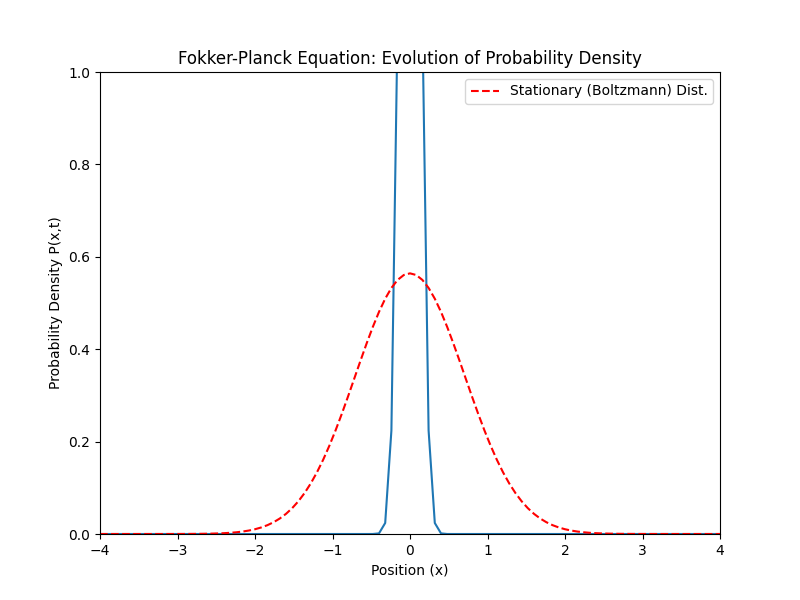

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === 시뮬레이션 파라미터 ===
Nx = 101             # 공간 격자점 개수
x_min, x_max = -4, 4
x = np.linspace(x_min, x_max, Nx)
dx = x[1] - x[0]

D = 1.0              # 확산 계수 (kT/gamma)
k = 2.0              # 포텐셜 세기 (랑주뱅 예제와 맞춤)
dt = 0.0005          # 시간 간격
nsteps = 1000        # 총 스텝 수

# === 초기 확률 분포 (중앙에 좁게 분포) ===
P = np.exp(-(x**2) / (2 * 0.1**2))
P /= np.sum(P) * dx  # 정규화

# === 시각화 설정 ===
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim(0, 1.0)
ax.set_xlim(x_min, x_max)
line, = ax.plot(x, P)
ax.set_title("Fokker-Planck Equation: Evolution of Probability Density")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density P(x,t)")

# 이론적인 정상 상태 분포 (볼츠만 분포)
P_stationary = np.exp(- (0.5 * k * x**2) / D)
P_stationary /= np.sum(P_stationary) * dx
ax.plot(x, P_stationary, 'r--', label='Stationary (Boltzmann) Dist.')
ax.legend()


# === FDM 업데이트 함수 ===
def update(frame):
    global P
    P_new = np.copy(P)
    for i in range(1, Nx - 1):
        # 중앙 차분법을 이용한 공간 미분
        drift_term = -k * x[i] * (P[i+1] - P[i-1]) / (2 * dx)
        diffusion_term = D * (P[i+1] - 2*P[i] + P[i-1]) / (dx**2)
        
        P_new[i] = P[i] + (drift_term + diffusion_term) * dt
    
    P = P_new
    line.set_ydata(P)
    return line,

# === 애니메이션 실행 ===
ani = FuncAnimation(fig, update, frames=nsteps, blit=True, interval=10)
plt.show()

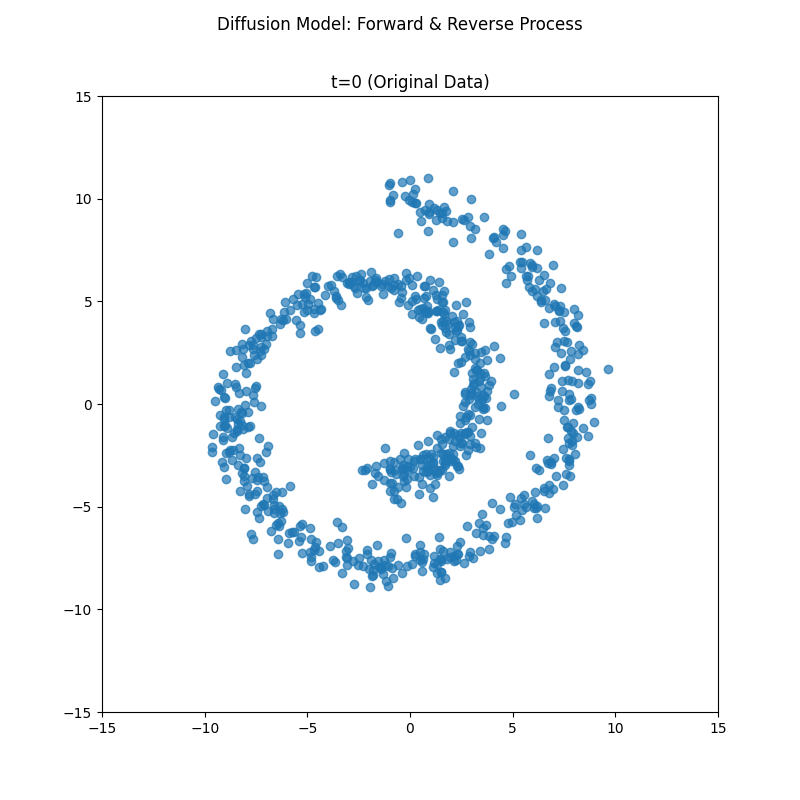

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_swiss_roll

# --- 데이터 준비 ---
n_samples = 800
X, _ = make_swiss_roll(n_samples, noise=0.8)
X = X[:, [0, 2]]  # 2D로 만듦
X = (X - X.mean(axis=0)) / X.std(axis=0) * 5 # 스케일링

# --- 확산 모델 파라미터 ---
n_steps = 100  # 애니메이션 프레임 수 (총 확산 스텝)
betas = np.linspace(0.001, 0.2, n_steps)
alphas = 1. - betas
alphas_cumprod = np.cumprod(alphas)

# --- Forward Process 경로 미리 계산하기 ---
# 각 데이터 포인트에 대해 노이즈가 추가되는 전체 경로를 저장합니다.
trajectories = []
for t in range(n_steps):
    alpha_bar = alphas_cumprod[t]
    mean_coeff = np.sqrt(alpha_bar)
    std_dev = np.sqrt(1 - alpha_bar)
    
    noise = np.random.randn(*X.shape)
    xt = mean_coeff * X + std_dev * noise
    trajectories.append(xt)
trajectories = np.stack(trajectories) # Shape: (n_steps, n_samples, 2)

# --- 애니메이션 설정 ---
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(X[:, 0], X[:, 1], alpha=0.7)

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_aspect('equal', adjustable='box')
title = ax.set_title("t=0 (Original Data)")

def animate_diffusion(frame):
    # 총 200 프레임 애니메이션: 100(forward) + 100(reverse)
    if frame < n_steps:
        # Forward Process (0 -> 99)
        t = frame
        scatter.set_offsets(trajectories[t])
        title.set_text(f"Forward Process: t={t}")
    else:
        # Reverse Process (99 -> 0)
        t = n_steps - 1 - (frame - n_steps)
        scatter.set_offsets(trajectories[t])
        title.set_text(f"Reverse Process: t={t}")
    
    # 마지막 프레임에서 점 색깔 변경
    if t == (n_steps-1):
        scatter.set_color('red') # Pure noise
    else:
        scatter.set_color('C0') # Default blue
        
    return scatter, title

# --- 애니메이션 실행 ---
# forward(100) + reverse(100) = 200 프레임
ani = FuncAnimation(fig, animate_diffusion, frames=2*n_steps, interval=50, blit=True)
plt.suptitle("Diffusion Model: Forward & Reverse Process")
plt.show()

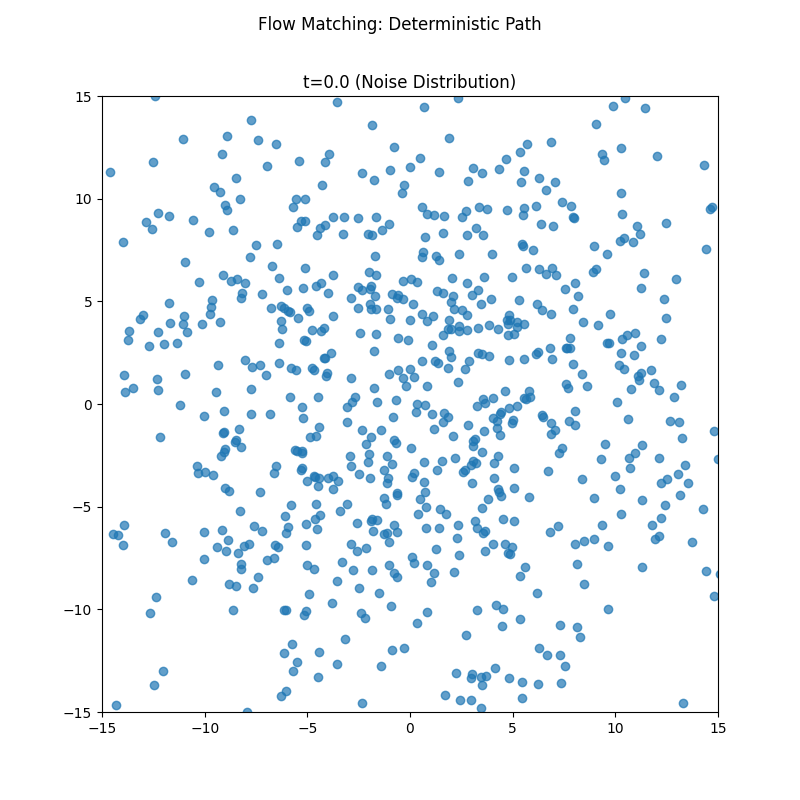

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_swiss_roll

# --- 데이터 준비 ---
n_samples = 800
# 1. 목표 데이터 분포 (x1)
x1, _ = make_swiss_roll(n_samples, noise=0.8)
x1 = x1[:, [0, 2]]
x1 = (x1 - x1.mean(axis=0)) / x1.std(axis=0) * 5

# 2. 초기 노이즈 분포 (x0)
x0 = np.random.randn(n_samples, 2) * 8 # 좀 더 넓게 퍼진 노이즈

# --- 애니메이션 설정 ---
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(x0[:, 0], x0[:, 1], alpha=0.7)

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_aspect('equal', adjustable='box')
title = ax.set_title("t=0.0 (Noise Distribution)")

def animate_flow(frame):
    # frame은 0 ~ 100 사이의 값
    t = frame / 100.0
    
    # x0에서 x1으로 직선으로 이동(선형 보간)
    xt = (1 - t) * x0 + t * x1
    scatter.set_offsets(xt)
    title.set_text(f"Flow Matching: t={t:.2f}")

    if t < 0.01:
        scatter.set_color('red') # Start
    elif t > 0.99:
        scatter.set_color('C0') # End
    else:
        scatter.set_color('green') # In-between
        
    return scatter, title

# --- 애니메이션 실행 ---
ani = FuncAnimation(fig, animate_flow, frames=101, interval=50, blit=True)
plt.suptitle("Flow Matching: Deterministic Path")
plt.show()

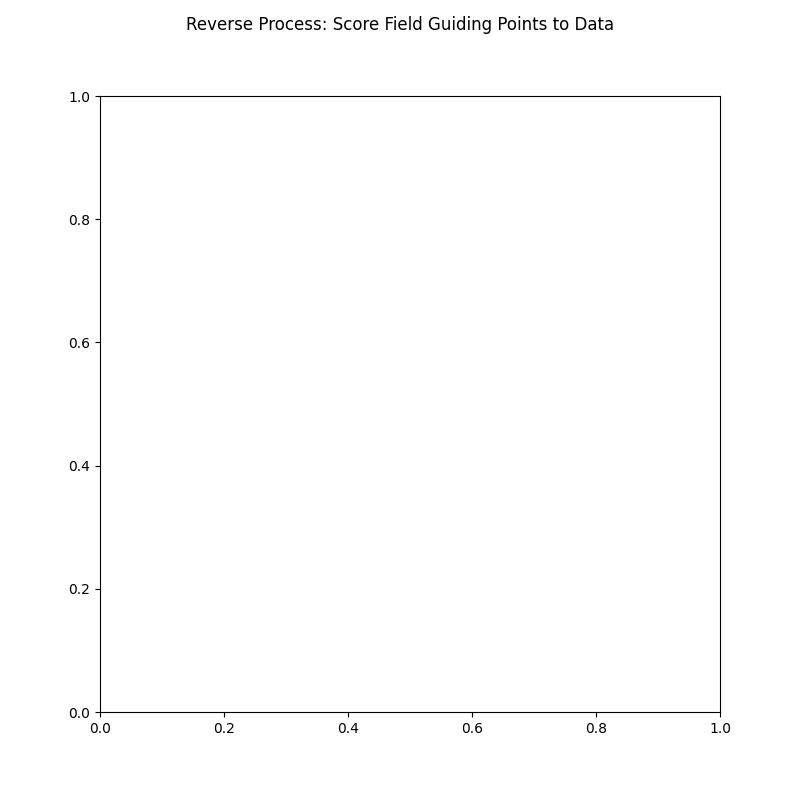

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_swiss_roll

# --- 1. 데이터 및 확산 파라미터 준비 ---
n_samples = 500  # 샘플 수를 조금 줄여서 화살표가 잘 보이게 함
X, _ = make_swiss_roll(n_samples, noise=0.8)
X = X[:, [0, 2]]
X = (X - X.mean(axis=0)) / X.std(axis=0) * 5

n_steps = 100
betas = np.linspace(0.001, 0.2, n_steps)
alphas = 1. - betas
alphas_cumprod = np.cumprod(alphas)
# np.newaxis를 이용해 브로드캐스팅이 가능하도록 차원을 맞춰줍니다.
sqrt_alphas_cumprod = np.sqrt(alphas_cumprod)[:, np.newaxis, np.newaxis]
sqrt_one_minus_alphas_cumprod = np.sqrt(1. - alphas_cumprod)[:, np.newaxis, np.newaxis]

# --- 2. 경로 및 Score Field 미리 계산하기 ---
# Forward Process 경로
noise = np.random.randn(n_steps, n_samples, 2)
trajectories = sqrt_alphas_cumprod * X + sqrt_one_minus_alphas_cumprod * noise

# 각 시간 단계에서의 Score Field 계산
# Score(xt, t) ≈ -ε / sqrt(1 - ᾱ_t)
# 여기서 ε는 추가된 노이즈입니다.
scores = -noise / sqrt_one_minus_alphas_cumprod

# --- 3. 애니메이션 설정 ---
fig, ax = plt.subplots(figsize=(8, 8))

def animate_score_field(frame):
    ax.clear() # 이전 프레임의 점과 화살표를 모두 지움
    
    t = frame
    xt = trajectories[t]
    score_t = scores[t]
    
    # 점(데이터 분포) 그리기
    ax.scatter(xt[:, 0], xt[:, 1], alpha=0.6, s=15)
    
    # Score 벡터 필드(화살표) 그리기
    # quiver(x_pos, y_pos, x_dir, y_dir, ...)
    # scale: 화살표 길이를 조절하는 파라미터. 값이 클수록 화살표가 짧아짐
    ax.quiver(xt[:, 0], xt[:, 1], score_t[:, 0], score_t[:, 1], 
              color='red', headwidth=4, headlength=6, width=0.005, scale=50)

    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"Score Field Evolution: t={t}")

    # 리턴값이 없어도 clear()를 사용하면 정상 동작합니다.
    return 

# --- 4. 애니메이션 실행 ---
# Reverse Process (노이즈 -> 데이터) 방향으로 애니메이션을 보여줍니다.
# 즉, 시간이 거꾸로 흐르는 것처럼 t=99 에서 t=0 으로 진행합니다.
# 이것이 생성 과정과 일치하여 더 직관적입니다.
frames = range(n_steps - 1, -1, -1) # 99, 98, ..., 0

ani = FuncAnimation(fig, animate_score_field, frames=frames, interval=100)
plt.suptitle("Reverse Process: Score Field Guiding Points to Data")
plt.show()


# 사용자가 보신 이미지에서 벡터가 없는 빈 공간은 Score Field가 정말로 '0'이거나 존재하지 않는 것이 아닙니다. 단지 시각화의 효율성과 직관성을 위해, 우리가 관심을 가지고 있는 파란색 점들의 위치에서만 벡터를 그려 표현했기 때문에 비어 보이는 것입니다. 
# 이론적으로는 그 빈 공간에도 모두 방향을 가리키는 벡터들이 존재하고 있습니다.

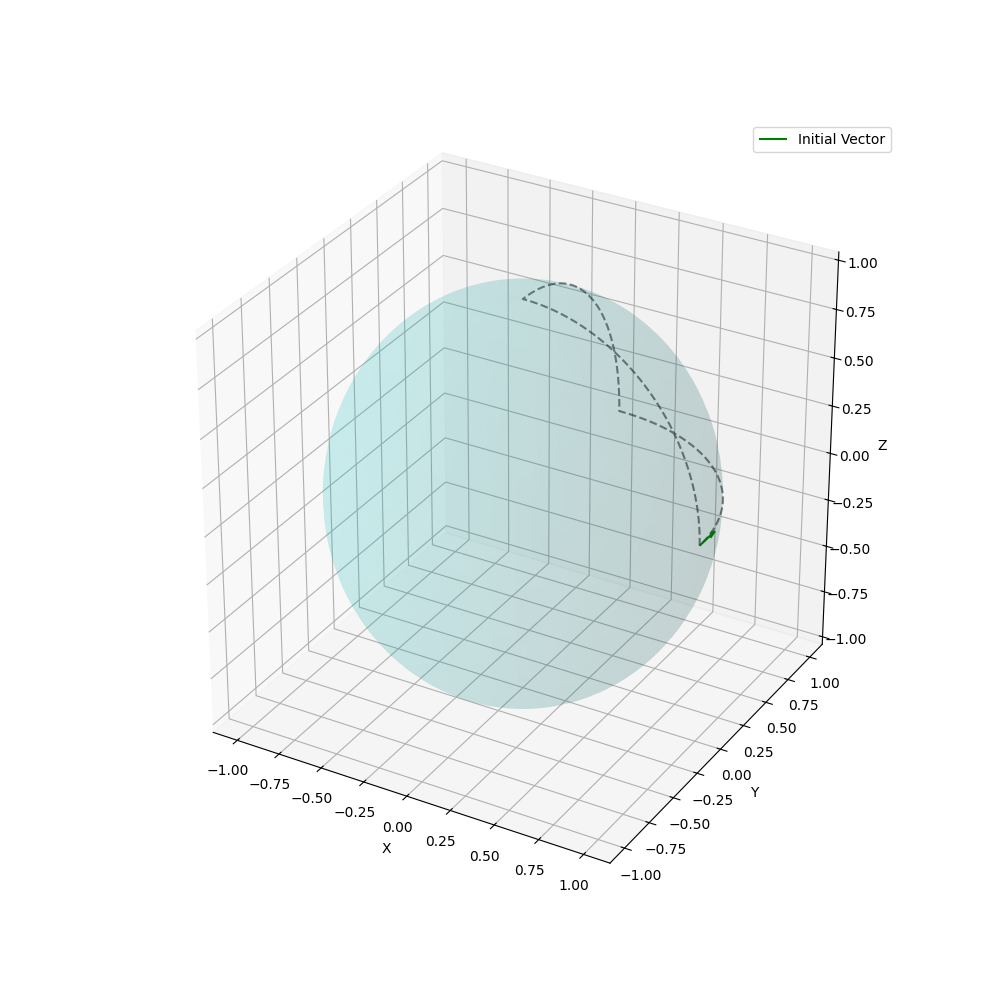

In [15]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# --- 3D 시각화 환경 설정 ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1]) # 정육면체 비율

# 구의 반지름
R = 1.0

# 1. 구 그리기 (배경)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = R * np.outer(np.cos(u), np.sin(v))
y_sphere = R * np.outer(np.sin(u), np.sin(v))
z_sphere = R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='c', alpha=0.1)

# --- 평행이동 경로 정의 (구면 삼각형) ---
n_points_per_leg = 100
total_frames = n_points_per_leg * 3

# 경로 1: (R, 0, 0)에서 북극 (0, 0, R)으로 (경도 0)
theta1 = np.linspace(np.pi/2, 0, n_points_per_leg)
phi1 = np.zeros_like(theta1)

# 경로 2: 북극에서 (0, R, 0)으로 (경도 90도)
theta2 = np.linspace(0, np.pi/2, n_points_per_leg)
phi2 = np.full_like(theta2, np.pi/2)

# 경로 3: (0, R, 0)에서 다시 (R, 0, 0)으로 (적도)
theta3 = np.full_like(theta1, np.pi/2)
phi3 = np.linspace(np.pi/2, 0, n_points_per_leg)

# 전체 경로 결합
theta_path = np.concatenate([theta1, theta2, theta3])
phi_path = np.concatenate([phi1, phi2, phi3])

# 구면 좌표 -> 직교 좌표 변환
x_path = R * np.sin(theta_path) * np.cos(phi_path)
y_path = R * np.sin(theta_path) * np.sin(phi_path)
z_path = R * np.cos(theta_path)

# --- 애니메이션 객체 초기화 ---
# 전체 경로를 연하게 미리 그리기
ax.plot(x_path, y_path, z_path, 'k--', alpha=0.5)

# 현재까지 지나온 경로
line, = ax.plot([], [], [], 'b-', linewidth=2)
# 현재 위치
point, = ax.plot([], [], [], 'bo', markersize=8)

# 초기 벡터 설정
start_point = np.array([x_path[0], y_path[0], z_path[0]])
# 초기 벡터: 출발점에서 y축 방향 (적도에 접함)
current_vector = np.array([0, 1.0, 0])
# 벡터 길이 정규화
vector_length = 0.4
current_vector = current_vector / np.linalg.norm(current_vector) * vector_length

# Quiver 객체 (벡터 화살표)
# Quiver3D는 업데이트가 까다로워 매번 새로 그리는 방식을 사용
quiver = None 

# 시작점에서의 벡터를 비교용으로 표시
ax.quiver(start_point[0], start_point[1], start_point[2],
          current_vector[0], current_vector[1], current_vector[2],
          color='g', length=vector_length, label='Initial Vector')

ax.legend()
ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')

# --- 애니메이션 업데이트 함수 ---
def update(frame):
    global current_vector, quiver
    
    # 현재 위치 P
    P = np.array([x_path[frame], y_path[frame], z_path[frame]])
    
    if frame > 0:
        # 이전 벡터를 현재 위치 P로 평행이동 (in R^3)
        # 이 단계에서는 아직 접벡터가 아님
        
        # P에서의 법선 벡터는 원점에서 P를 향하는 벡터와 같음 (n = P/R)
        normal_at_P = P / np.linalg.norm(P)
        
        # 이전 벡터를 P의 접평면에 투영하여 새로운 접벡터를 얻음
        # V_new = V_old - (V_old · n) * n
        v_projected = current_vector - np.dot(current_vector, normal_at_P) * normal_at_P
        
        # 길이를 일정하게 유지 (수치 오차 보정)
        current_vector = v_projected / np.linalg.norm(v_projected) * vector_length
        
    # 지나온 경로 업데이트
    line.set_data(x_path[:frame+1], y_path[:frame+1])
    line.set_3d_properties(z_path[:frame+1])
    
    # 현재 위치 업데이트
    point.set_data([P[0]], [P[1]])
    point.set_3d_properties([P[2]])
    
    # 벡터(Quiver) 업데이트
    if quiver:
        quiver.remove() # 이전 화살표 제거
    quiver = ax.quiver(P[0], P[1], P[2], 
                       current_vector[0], current_vector[1], current_vector[2], 
                       color='r', length=vector_length, normalize=True)
                       
    return line, point, quiver

# --- 애니메이션 생성 및 실행 ---
ani = FuncAnimation(fig, update, frames=total_frames, interval=20, blit=False)
plt.show()

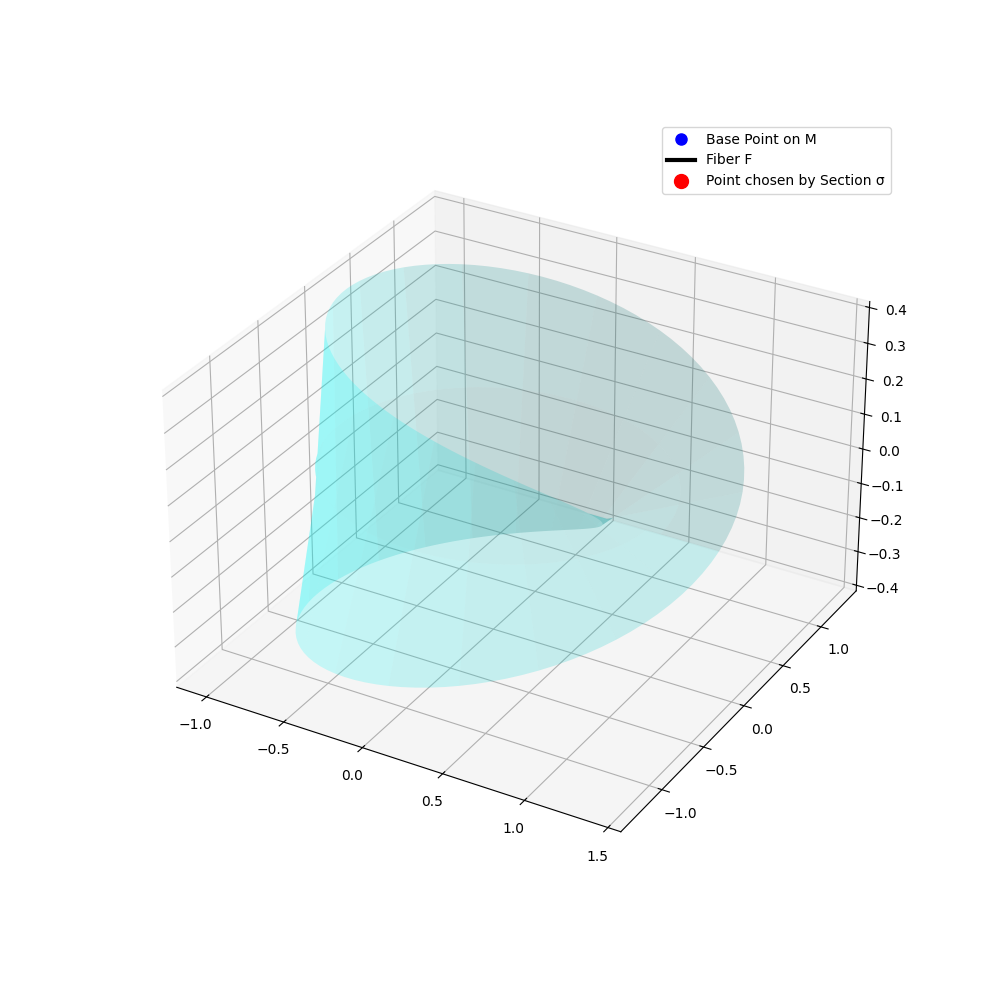

In [16]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# --- 3D 시각화 환경 설정 ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1.5, 1.5, 1])

# --- 뫼비우스 띠 파라미터화 및 그리기 ---
R = 1.0  # 중심원의 반지름
w = 0.4  # 띠의 폭
u = np.linspace(0, 2 * np.pi, 100) # 기저 공간(원) 파라미터
v = np.linspace(-w, w, 10)         # 올(선분) 파라미터

u, v = np.meshgrid(u, v)
x = (R + v * np.cos(u / 2)) * np.cos(u)
y = (R + v * np.cos(u / 2)) * np.sin(u)
z = v * np.sin(u / 2)
ax.plot_surface(x, y, z, alpha=0.2, color='cyan', rstride=5, cstride=5)

# --- 애니메이션 설정 ---
n_frames = 200
base_path_u = np.linspace(0, 2 * np.pi, n_frames)

# 애니메이션 객체
base_point, = ax.plot([], [], [], 'bo', markersize=8, label='Base Point on M')
fiber_line, = ax.plot([], [], [], 'k-', linewidth=3, label='Fiber F')
section_point, = ax.plot([], [], [], 'ro', markersize=10, label='Point chosen by Section σ')

# --- "불가능한" 섹션 정의 ---
# 항상 +방향으로 일정한 거리에 있으려는 시도
section_dist = 0.3

def update(frame):
    u_i = base_path_u[frame]
    
    # 1. 기저 공간(M) 위의 점 업데이트 (v=0인 경우)
    base_x = R * np.cos(u_i)
    base_y = R * np.sin(u_i)
    base_z = 0
    base_point.set_data([base_x], [base_y])
    base_point.set_3d_properties([base_z])
    
    # 2. 해당 점에서의 올(F) 그리기
    v_line = np.linspace(-w, w, 2)
    fiber_x = (R + v_line * np.cos(u_i / 2)) * np.cos(u_i)
    fiber_y = (R + v_line * np.cos(u_i / 2)) * np.sin(u_i)
    fiber_z = v_line * np.sin(u_i / 2)
    fiber_line.set_data(fiber_x, fiber_y)
    fiber_line.set_3d_properties(fiber_z)

    # 3. 섹션이 선택한 점 업데이트
    # u_i/2의 sin, cos 때문에 v의 방향이 뒤집히는 것을 볼 수 있음
    v_s = section_dist 
    sec_x = (R + v_s * np.cos(u_i / 2)) * np.cos(u_i)
    sec_y = (R + v_s * np.cos(u_i / 2)) * np.sin(u_i)
    sec_z = v_s * np.sin(u_i / 2)
    section_point.set_data([sec_x], [sec_y])
    section_point.set_3d_properties([sec_z])

    ax.view_init(elev=30., azim=1.5*frame) # 카메라 회전
    return base_point, fiber_line, section_point

ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)
ax.legend()
plt.show()

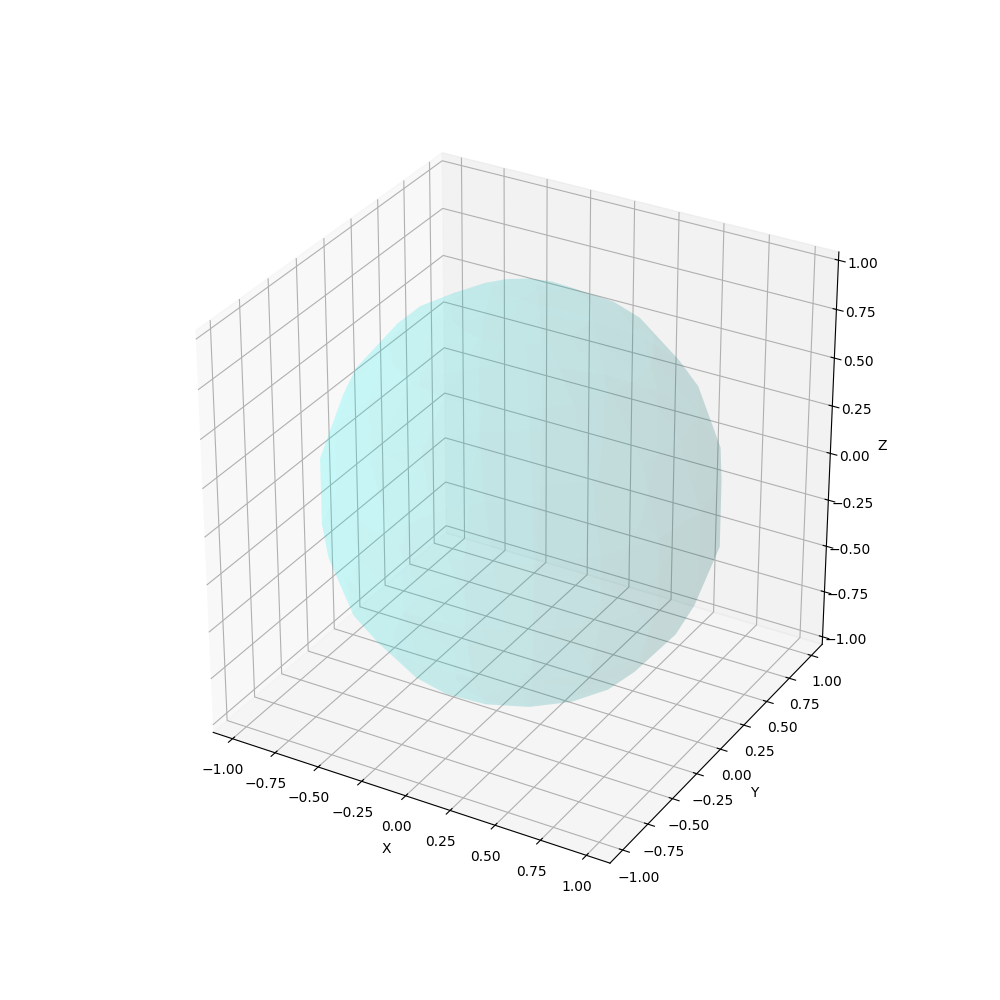

In [33]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# --- 3D 시각화 환경 설정 ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])

# --- 구 그리기 ---
R = 1.0
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x_s = R * np.cos(u) * np.sin(v)
y_s = R * np.sin(u) * np.sin(v)
z_s = R * np.cos(v)
ax.plot_surface(x_s, y_s, z_s, color="cyan", alpha=0.1)

# --- 섹션(벡터 필드) 정의 ---
# z축을 중심으로 회전하는 간단한 벡터 필드 (북극과 남극에 특이점이 생김)
def vector_field(p):
    x, y, z = p
    # v = (-y, x, 0) 은 z축 회전 필드.
    # 이 벡터는 p에서의 접벡터가 아닐 수 있으므로 투영이 필요하지만,
    # 시각화를 위해 간단한 형태로 사용. 이 필드는 적도에서 가장 잘 정의됨.
    v = np.array([-y, x, 0])
    # 길이를 정규화하여 보기 좋게 만듦
    norm = np.linalg.norm(v)
    if norm > 0:
        return v / norm * 0.3
    return v # 0벡터 (특이점)

# --- 애니메이션 설정 ---
n_frames = 200
# 기저 공간 위의 경로: 적도에서 북극으로
path_phi = np.zeros(n_frames)
path_theta = np.linspace(np.pi / 2, 0, n_frames)

# 애니메이션 객체
base_point, = ax.plot([], [], [], 'bo', markersize=8, label='Base Point p on S²')
quiver = None

def update(frame):
    global quiver
    
    # 1. 기저 공간 S² 위의 현재 점 p
    theta, phi = path_theta[frame], path_phi[frame]
    px = R * np.sin(theta) * np.cos(phi)
    py = R * np.sin(theta) * np.sin(phi)
    pz = R * np.cos(theta)
    
    base_point.set_data([px], [py])
    base_point.set_3d_properties([pz])
    
    # 2. 섹션(벡터 필드)이 지정하는 접벡터 v
    p = np.array([px, py, pz])
    v = vector_field(p)
    
    # 3. Quiver로 벡터 그리기
    if quiver:
        quiver.remove()
    quiver = ax.quiver(px, py, pz, v[0], v[1], v[2], color='r')
    
    return base_point,

ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)
ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
plt.show()

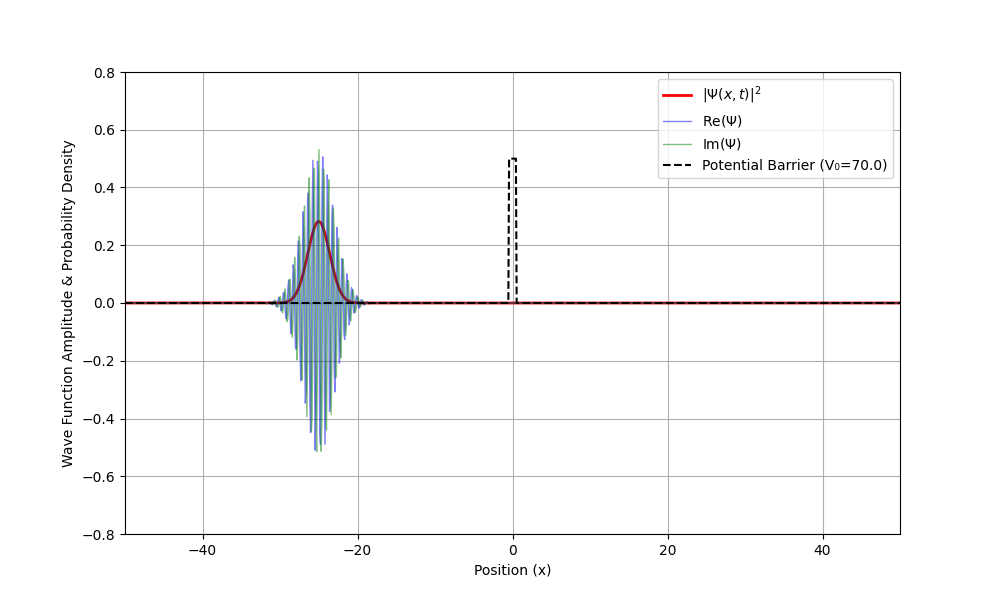

In [32]:
# %matplotlib widget 매직 커맨드를 최상단에 추가
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === 물리 상수 및 시뮬레이션 파라미터 ===
hbar = 1.0  # 플랑크 상수 (ħ=1로 정규화)
m = 1.0     # 입자의 질량 (m=1로 정규화)

# 공간 그리드 설정
N = 1024                 # 격자점 개수
L = 100.0                # 시뮬레이션 공간의 길이
dx = L / N
x = np.linspace(-L/2, L/2, N)

# 운동량(주파수) 공간 그리드 설정
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# 시간 설정
dt = 0.05
n_steps = 800

# === 초기 파동함수 설정: 가우시안 파동 묶음 ===
x0 = -25.0       # 초기 위치
sigma = 2.0      # 파동 묶음의 폭
k0 = 10.0        # 초기 운동량 (오른쪽으로 이동)

# Ψ(x, 0) = exp(-(x-x0)²/2σ²) * exp(ik₀x)
psi = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
# 파동함수 정규화 (전체 확률 = 1)
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)


# === 포텐셜 장벽 설정 ===
V0 = 70.0        # 장벽의 높이
barrier_width = 1.0
V = np.zeros(N)
V[(x > -barrier_width/2) & (x < barrier_width/2)] = V0

# 해밀토니안의 각 부분에 대한 시간 진화 연산자
# exp(-i * V * dt / ħ)
V_op = np.exp(-1j * V * dt / (2 * hbar)) 
# exp(-i * T * dt / ħ), T = p²/2m = (ħk)²/2m
T_op = np.exp(-1j * hbar * k**2 * dt / (2 * m))

# === 애니메이션을 위한 시각화 설정 ===
fig, ax = plt.subplots(figsize=(10, 6))

# 파동함수의 확률 밀도 |Ψ|² 를 그릴 선
prob_line, = ax.plot(x, np.abs(psi)**2, 'r-', lw=2, label=r'$|\Psi(x,t)|^2$')
# 파동함수의 실수부와 허수부 (참고용)
real_line, = ax.plot(x, np.real(psi), 'b-', lw=1, alpha=0.5, label=r'Re($\Psi$)')
imag_line, = ax.plot(x, np.imag(psi), 'g-', lw=1, alpha=0.5, label=r'Im($\Psi$)')

# 포텐셜 장벽을 그리기
ax.plot(x, V / V0 * 0.5, 'k--', label=f'Potential Barrier (V₀={V0})') # 높이 정규화해서 표시

ax.set_ylim(-0.8, 0.8)
ax.set_xlim(-L/2, L/2)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Wave Function Amplitude & Probability Density")
ax.legend(loc='upper right')
ax.grid(True)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)

# === 애니메이션 업데이트 함수 (분할-스텝 푸리에 방법) ===
def update(frame):
    global psi
    
    # 1. 포텐셜에 의한 진화 (dt/2)
    psi = V_op * psi
    
    # 2. 운동량 공간으로 이동 및 운동 에너지에 의한 진화 (dt)
    psi_k = np.fft.fft(psi)
    psi_k = T_op * psi_k
    psi = np.fft.ifft(psi_k)
    
    # 3. 다시 포텐셜에 의한 진화 (dt/2)
    psi = V_op * psi
    
    # 그래프 데이터 업데이트
    prob = np.abs(psi)**2
    prob_line.set_ydata(prob)
    real_line.set_ydata(np.real(psi))
    imag_line.set_ydata(np.imag(psi))
    time_text.set_text(f'Time = {frame*dt:.2f}')
    
    return prob_line, real_line, imag_line, time_text

# === 애니메이션 생성 및 실행 ===
ani = FuncAnimation(fig, update, frames=n_steps, interval=20, blit=True)
plt.show()